In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys

In [3]:
#Our Dataset
data = np.array([0.40,0.53,0.22,0.38,0.35,0.32,0.26,0.19,0.08,0.41,0.45,0.30]).reshape(6,2)
print(data)

[[ 0.4   0.53]
 [ 0.22  0.38]
 [ 0.35  0.32]
 [ 0.26  0.19]
 [ 0.08  0.41]
 [ 0.45  0.3 ]]


Visualising Data

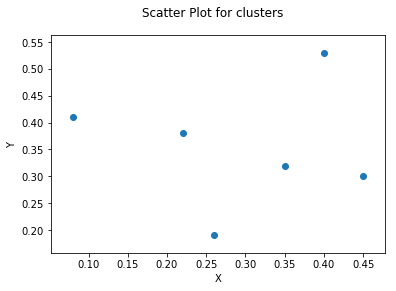

In [4]:
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(data[:,0],data[:,1])

  Distance Matrix: It is the matrix which contains distances between all the datapoints. If you have n datapoints, the distance matrix will be of order nXn.
  To calculate distance matrix, we use pairwise distance function of sklearn which returns distance matrix. For hierarchical clustering we use euclidean distance to calculate distance between two datapoints.

In [8]:
def hierarchical_clustering(data,linkage,no_of_clusters):  
    #first step is to calculate the initial distance matrix
    #it consists distances from all the point to all the point
    color = ['r','g','b','y','c','m','k','w']
    initial_distances = pairwise_distances(data,metric='euclidean')
    #making all the diagonal elements infinity 
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage) 
    
    #plotting the clusters
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0
    
    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()
    

In [9]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
                    
        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Linkage
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Complete Linkage
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Average Linkage
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        elif(linkage=="Centroid" or linkage =="centroid"):
            for i in range(0,input.shape[0]):
                if(i!=col_index and i!=row_index):
                    dist_centroid = cal_dist_from_centroid(i,row_index,col_index)
                    input[col_index][i] = dist_centroid
                    input[i][col_index] = dist_centroid
                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters

###### Every datapoint is different cluster initially 

[0, 1, 2, 3, 4, 5]


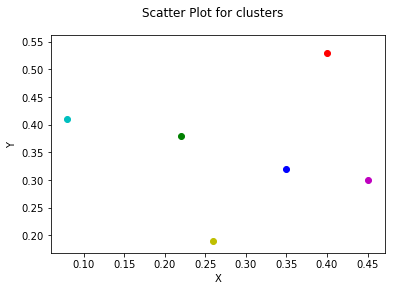

In [11]:
hierarchical_clustering(data,"single",6)

###### First data[5] and data[2] will merge, i.e. point P3 and P6 from the blog

[0, 1, 2, 3, 4, 2]


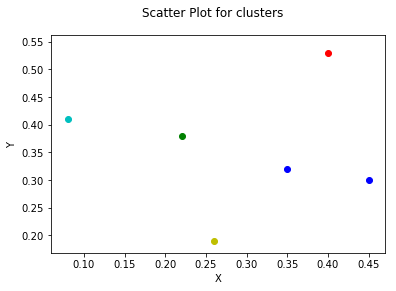

In [13]:
hierarchical_clustering(data,"single",5)
#you can see that the color of data[2] and data[5] became same, thus they are in same cluster now

###### Next merger data[1] and data[4],  i.e. P2 and P5 

[0, 1, 2, 3, 1, 2]


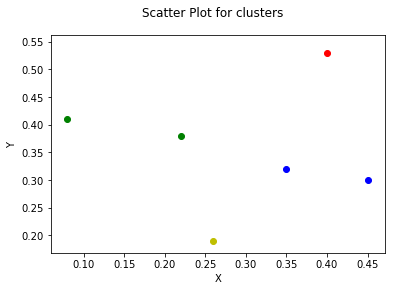

In [16]:
hierarchical_clustering(data,"single",4)
#you can see that the color of data[1] and data[4] also became same in color, thus they are in same cluster now

###### Next merger, 2 clusters formed above will merge

[0, 1, 1, 3, 1, 1]


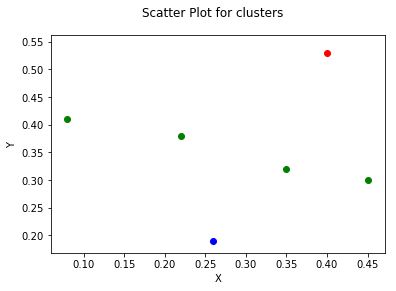

In [17]:
hierarchical_clustering(data,"single",3)

[0, 1, 1, 1, 1, 1]


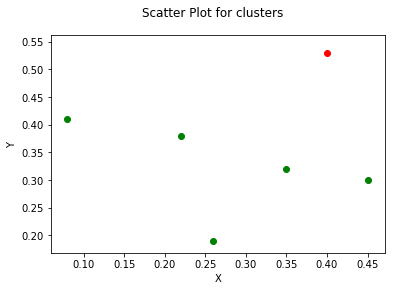

In [18]:
hierarchical_clustering(data,"single",2)

###### Finally all are in one cluster

[0, 0, 0, 0, 0, 0]


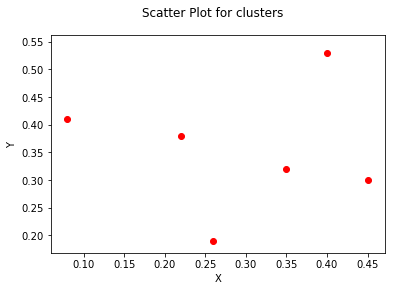

In [19]:
hierarchical_clustering(data,"single",1)